> **SOMETIMES THE QUESTIONS ARE COMPLICATED AND THE ANSWERS ARE SIMPLE **

>*Dr. Seuss*

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

#### Statistical Method

P(H) = ? 

P(HH) = ?

P(THH) = ?

Now, slightly tougher : P(2H, 1T) = ?

Generalizing, 

<img style="float: left;" src="img/binomial.gif">

<br>
<br>
<br>
<br>


**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

#### Hacker's Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased. 

In [75]:
import numpy as np  

total_tosses = 30
num_heads = 24
prob_head = 0.5

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Value Contained in the Experiment:", experiment)
# total_tosses become lengh of array
print("Length Of Data :", experiment.size)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1]) 
head_count = experiment[experiment==1].shape[0]
print("Number of heads in the experiment:", head_count)
# Run repeatly to see diferent result in Length Head

Value Contained in the Experiment: [1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1]
Length Of Data : 30
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 12


In [80]:
# Now, the above experiment needs to be repeated X times. 
# Let's write a function and put the above code in a loop

def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
#         experiment[experiment==1] sama dengan P(experiment==1)
#         statement experiment[experiment==1] adalah loop array tersendiri, 
# begitu kita isi index nya [experiment==1], 
# maka experiment akan difilter by experiment==1
        head_count[times] = experiment[experiment==1].shape[0]
    
    return head_count

In [81]:
head_count = coin_toss_experiment(100)
# display index 0-10
head_count[:10]

array([[14],
       [14],
       [18],
       [17],
       [16],
       [11],
       [13],
       [17],
       [16],
       [13]])

In [82]:
print("Dimensions:", head_count.shape, "\n","Type of object:", type(head_count))

Dimensions: (100, 1) 
 Type of object: <class 'numpy.ndarray'>


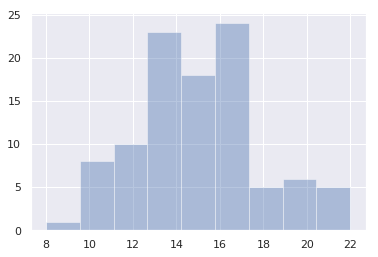

In [85]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
sns.distplot(head_count, kde=False)
# sns

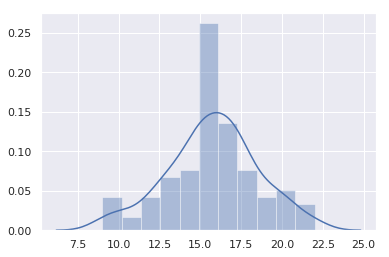

In [32]:
sns.distplot(head_count, kde=True)

**Exercise**: Try setting `kde=True` in the above cell and observe what happens

In [24]:
_24_head = head_count[head_count>=24].shape[0]
print("No of times experiment returned 24 heads or more:", _24_head)
percentage = _24_head/float(head_count.shape[0])*100
print("% of times with 24 or more heads: ", percentage)

No of times experiment returned 24 heads or more: 80
% of times with 24 or more heads:  0.08


# Is the coin fair?

because result,0.08%, is below than 5%, we conclude that the coin is UNFAIR/BIASED

### Extra pointers on numpy
**** Removing `for` loop in the funciton ****

In [10]:
def coin_toss_experiment_2(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

#### Exercise: Benchmark `coin_toss_experiment` and `coin_toss_experiment_2` for 100 and 100,000 runs and report improvements, if any